# Hito 2

## Preprocesamiento

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
# importar datos de la carpeta data
DATA_DIR = Path("./data").resolve()

df = pd.read_excel(
    "./data/base_indices_2005-2023.xlsx", sheet_name="BaseINDICES_2005_2023"
)

In [6]:
dfbkp = df.copy()
df = dfbkp.copy()

In [7]:
df.head()

,Año,Cód. Institución,Nombre Institución,Tipo Institución,Clasificación1,Clasificación2,Clasificación3,Clasificación4,Clasificación5,Clasificación6,...,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Códgo SIES,Pregrado/Posgrado
0,2023,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,68.0,82.0,2.0,150,302.0,392.0,5.0,694,I70S1C1J1V2,Pregrado
1,2023,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,54.0,45.0,10.0,99,191.0,205.0,23.0,396,I70S1C814J1V1,Pregrado
2,2023,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,353.0,234.0,16.0,587,1535.0,1126.0,52.0,2661,I70S1C58J1V1,Pregrado
3,2023,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,101.0,86.0,10.0,187,395.0,358.0,27.0,753,I70S1C816J1V1,Pregrado
4,2023,1001,U. DE CHILE,Univ.,(a) Universidades CRUCH,(a) Universidades Estatales CRUCH,(a) Acreditada,(a) Autónoma,(a) Adscritas a Gratuidad,(a) Subsistema Universitario,...,76.0,56.0,4.0,132,378.0,268.0,6.0,646,I70S1C47J1V1,Pregrado


In [8]:
df.shape

(218773, 60)

Notemos que la base de datos contiene la información de carreras por año, en donde hay data del año sobre las matriculas, la carrera, la institución. Hay columnas que de por sí no nos entregan información relevante a lo que buscamos o se puede extraer de otras columnas, como el orden geografico de la región, las menciones o especialidades, el idgenerocarrera, el nombre del campus, cód. campus y sede, Código SIES.

Por otro lado, si bien nos interesan los puntajes, con la información del premedio basta para nuestro analisis

In [9]:
# Eliminamos esas columnas
df = df.drop(
    [
        "Nombre de la Sede",
        "Orden Geográfico de la Región (Norte aSur)",
        "Mención o Especialidad",
        "idgenerocarrera",
        "Cód. Campus",
        "Cód. Sede",
        "Códgo SIES",
    ],
    axis=1,
)

In [10]:
# Eliminamos máximos
df = df.drop(
    [
        "Máximo Puntaje (promedio matemáticas y lenguaje)",
        "Máximo Puntaje NEM",
        "Máximo Puntaje Ranking",
    ],
    axis=1,
)

# Eliminamos mínimos
df = df.drop(
    [
        "Mínimo Puntaje (promedio matemáticas y lenguaje)",
        "Mínimo Puntaje NEM",
        "Mínimo Puntaje Ranking",
    ],
    axis=1,
)

In [11]:
# Identifiquemos los valores únicos por columna
unicos = df.nunique()
print(f"Cantidad de valores únicos por columna: \n \n{unicos} \n ")

Cantidad de valores únicos por columna: 
 
Año                                                      19
Cód. Institución                                        247
Nombre Institución                                      247
Tipo Institución                                          4
Clasificación1                                            6
Clasificación2                                            8
Clasificación3                                            2
Clasificación4                                            6
Clasificación5                                            2
Clasificación6                                            4
Comuna donde se imparte la carrera o programa           127
Nombre Region                                            16
Cód. Carrera                                          33071
Carrera Genérica                                        294
Nombre Programa                                        7935
Horario                                                  

De esto podemos notar que hay columnas que tienen pocos valores unicos, por lo que deben ser una especie de clasificación y por tanto es importanter ver si estas entregan una información relevante.

In [9]:
interes1 = [
    "Clasificación1",
    "Clasificación2",
    "Clasificación3",
    "Clasificación4",
    "Clasificación5",
    "Clasificación6",
]
for column in interes1:
    print(f"Valores únicos de la columna {column}: \n \n{df[column].unique()} \n ")

interes2 = [
    "Horario",
    "Tipo Programa",
    "IngresoDirecto",
    "Tipo Moneda",
    "Pregrado/Posgrado",
]
for column in interes2:
    print(f"Valores únicos de la columna {column}: \n \n{df[column].unique() } \n ")

Valores únicos de la columna Clasificación1: 
 
['(a) Universidades CRUCH' '(b) Universidades Privadas'
 '(c) Institutos Profesionales' '(d) Centros de Formación Técnica'
 '(e) Centros de Formación Técnica Estatales' '(f) F.F.A.A.'] 
 
Valores únicos de la columna Clasificación2: 
 
['(a) Universidades Estatales CRUCH' '(b) Universidades Privadas CRUCH'
 '(d) Universidades Privadas' '(c) Univ. Privadas Adscritas SUA'
 '(e) Institutos Profesionales' '(f) Centros de Formación Técnica'
 '(g) Centros de Formación Técnica Estatales' '(h) F.F.A.A.'] 
 
Valores únicos de la columna Clasificación3: 
 
['(a) Acreditada' '(b) No Acreditada'] 
 
Valores únicos de la columna Clasificación4: 
 
['(a) Autónoma' '(e) Cerrada' '(b) Licenciamiento' '(e) F.F.A.A.'
 '(c) Examinación' '(d) Supervisión'] 
 
Valores únicos de la columna Clasificación5: 
 
['(a) Adscritas a Gratuidad' '(b) No Adscritas/No Aplica'] 
 
Valores únicos de la columna Clasificación6: 
 
['(a) Subsistema Universitario' '(c) No adsc

Según lo que estamos buscando, dentro de las clasificaciones, la columna "Clasificación2" entrega una sub caracterizacipon de la columna "Clasificación1" por lo que no entrega información relevante según nuestro enfoque. Por otro lado, se puede observar que en la columna "Tipo Moneda" en verdad son loslo 2 opciones que una de ellas está escrita de forma distinta por lo que hay que corregir esa columna. Por último, la comuna de "Pregrado/posgrado" hay que revisar la frecuencia de estas, para elegir si enfocarnos en las matrículas especificas de alguna de ellas o en general.

In [12]:
df["Tipo Moneda"] = df["Tipo Moneda"].str.strip().str.capitalize()

In [13]:
df["Tipo Moneda"].value_counts()

Tipo Moneda
Pesos    217446
Uf         1327
Name: count, dtype: int64

In [14]:
# Identifiquemos los valores nulos
vacios = df.isnull().sum()
vacios = (vacios[vacios > 0] / df.shape[0]) * 100
vacios = vacios.astype(int)
vacios = vacios.sort_values(ascending=False)
indices_vacios = vacios[vacios > 24].index
indices_vacios

Index(['Promedio Puntaje Ranking', 'Promedio Puntaje NEM',
       'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (último seleccionado)',
       'Nº Alumnos Ingreso Via PSU o PDT',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Nº Alumnos Ingreso Otra Via', 'Grado Académico', 'Nombre del Campus',
       'Matrícula primer año extranjeros', 'Vacantes', 'Valor de arancel'],
      dtype='object')

Se elimninan columnas con porcentaje de nulos mayor al 24%

In [15]:
df = df.drop(indices_vacios, axis=1)

In [16]:
df.shape

(218773, 34)

Debido a que el porcentaje de nulos en la parte de puntajes es extremadamente alta, modificaremos el dataset para obtener registros con una menor tasa de nulos.

In [14]:
# df_inmueble = pd.read_excel('./data/indices_institucional_2005_2022.xlsx', sheet_name='Inmuebles')
# df_labs = pd.read_excel('./data/indices_institucional_2005_2022.xlsx', sheet_name='Laboratorios y Talleres')

In [15]:
# quitamos FFAA, IP, CFT, Posgrado, Privadas y carreras vespertinas
# df_limpio = df[
#     (df["Tipo Institución"] == "Univ.")
#     & (df["Pregrado/Posgrado"] == "Pregrado")
#     & (df["Clasificación1"] == "(a) Universidades CRUCH")
#     & (df["Horario"] == "Diurno")
# ]
# df_limpio = df_limpio.drop(["Pregrado/Posgrado"], axis=1)
# df_limpio["Tipo Institución"].unique()

In [36]:
# x = len(df_limpio["Puntaje de corte (último seleccionado)"])
# y = df_limpio["Puntaje de corte (último seleccionado)"].isnull().sum()
# print(
#     f"Existe {y/x*100}% de nulos en la columna Puntaje de corte (último seleccionado)"
# )

In [37]:
# sin = df_limpio[df_limpio["Puntaje de corte (último seleccionado)"].isnull()]
# sin

In [38]:
# Identifiquemos los valores nulos
# vacios_fin = df_limpio.isnull().sum()
# print(
#     f"Porcentaje valores vacios por columna: \n \n{100*vacios_fin/df_limpio.shape[0]} \n "
# )

In [17]:
len(df) == len(df.drop_duplicates())

True

In [21]:
# renombramos la columna Pregrado/Posgrado para que el profiler no las separe
df = df.rename(columns={"Pregrado/Posgrado": "Pregrado o Posgrado"})

## Clustering

In [24]:
# Se importan las librerías necesarias
import os
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import OneClassSVM
import scipy.stats as stats
import re
from sklearn.pipeline import Pipeline
import seaborn as sns

# Librerías de visualización
import matplotlib.pyplot as plt

# Desactivar warnings
import warnings

warnings.filterwarnings("ignore")

In [25]:
class Profiler:
    """Clase para generar un reporte de un dataset"""

    def __init__(self, data):
        """Constructor de la clase
        Parameters
        ----------
        data: pandas.DataFrame
            Dataset a analizar

        Returns
        ----------
        None
            Crea una carpeta para guardar el reporte
        """
        self.original_data = data.copy()
        self.data = data
        self.date = datetime.now().strftime("%d-%m-%Y")
        self.path = f"EDA_{self.date}"
        self.preprocessor = None
        self.clean_transformer = None
        self.scale_transformer = None
        self.clusters_transformer = None
        self.anomaly_transformer = None
        os.mkdir(self.path)

    def summarize(
        self,
        variables,
        threshold_null=0.5,
        threshold_unique=0.5,
        threshold_cero=0.6,
        threshold_neg=0.5,
        threshold_outliers=0.6,
    ):
        """ " Genera un reporte de las variables de un dataset
        Parameters
        ----------
        variables: list
            Lista de variables a analizar
        threshold_null: float
            Umbral de valores nulos para generar una alerta
        threshold_unique: float
            Umbral de valores únicos para generar una alerta
        threshold_cero: float
            Umbral de valores cero para generar una alerta
        threshold_neg: float
            Umbral de valores negativos para generar una alerta
        threshold_outliers: float
            Umbral de outliers para generar una alerta

        Returns
        ----------
        None
              Muestra y guarda un reporte de las variables de un dataset
        """

        archivo = open(f"{self.path}/summary.txt", "a", encoding="utf-8")
        archivo.write(f"Reporte de variables del dataset \n")
        print(f"Reporte de variables del dataset \n")
        archivo.write(f"Fecha de creación del reporte: {self.date} \n")
        archivo.write(
            f"El dataset contiene:\n\t{self.data.shape[0]} filas\n\t{self.data.shape[1]} columnas\n\t{self.data.duplicated().sum()} valores duplicados\n\t{self.data.isnull().sum().sum()} valores nulos\n"
        )
        print(
            f"El dataset contiene:\n\t{self.data.shape[0]} filas\n\t{self.data.shape[1]} columnas\n\t{self.data.duplicated().sum()} valores duplicados\n\t{self.data.isnull().sum().sum()} valores nulos\n"
        )

        for variable in variables:
            if variable in self.data.columns:
                # Información general : variable, tipo, valores únicos y valores nulos
                inicio = f"Analizando variable: {variable}"
                tipo = f"Tipo de variable: {self.data[variable].dtype}"
                unicos = f"Valores únicos: {self.data[variable].nunique()}"
                nulos = f"Valores nulos: {self.data[variable].isnull().sum()}"

                # Guardar en el archivo
                archivo.write("\n###############################################\n \n")
                archivo.write(f"{inicio}\n\t{tipo}\n\t{unicos}\n\t{nulos}\n")

                # Reportar en consola
                print("\n###############################################\n \n")
                print(f"{inicio} \n{tipo} \n{unicos} \n{nulos}")

                # Alertas de anomalías generales
                if (
                    self.data[variable].isnull().sum()
                    > threshold_null * self.data[variable].shape[0]
                ):
                    archivo.write(
                        f" ALERTA: Tiene más del {threshold_null*100}% de valores nulos\n"
                    )
                    print(
                        f"ALERTA: Tiene más del {threshold_null*100}% de valores nulos"
                    )

                if (
                    self.data[variable].nunique()
                    < threshold_unique * self.data[variable].shape[0]
                ):
                    archivo.write(
                        f" ALERTA: Tiene menos del {threshold_unique*100}% de valores únicos\n"
                    )
                    print(
                        f"ALERTA: Tiene menos del {threshold_unique*100}% de valores únicos"
                    )

                # Si la variable es numérica
                if (
                    self.data[variable].dtype == "float64"
                    or self.data[variable].dtype == "int64"
                ):
                    # Información específica: valores cero, negativos, outliers y estadística descriptiva
                    cero = f"Valores cero: {self.data[variable].isin([0]).sum()}"
                    negativos = f"Valores negativos: {self.data[variable].lt(0).sum()}"
                    outliers = f"Outliers: {self.data[variable].gt(self.data[variable].quantile(0.75) + 1.5*(self.data[variable].quantile(0.75) - self.data[variable].quantile(0.25))).sum()}"

                    # Estadística descriptiva
                    count = self.data[variable].count()
                    mean = self.data[variable].mean()
                    std = self.data[variable].std()
                    minim = self.data[variable].min()
                    quantile_25 = self.data[variable].quantile(0.25)
                    median = self.data[variable].median()
                    quantile_75 = self.data[variable].quantile(0.75)
                    maxim = self.data[variable].max()

                    estadistica = f"Estadística descriptiva:\n\t\tcount: {count}\n\t\tmean: {mean}\n\t\tstd: {std}\n\t\tmin: {minim}\n\t\t25%: {quantile_25}\n\t\t50%: {median}\n\t\t75%: {quantile_75}\n\t\tmax: {maxim}"

                    # Guardar en el archivo
                    archivo.write(
                        f"\t{cero}\n\t{negativos}\n\t{outliers}\n\t{estadistica}\n"
                    )

                    # Reportar en consola
                    print(
                        f"Estadística descriptiva:\n\tcount: {count}\n\tmean: {mean}\n\tstd: {std}\n\tmin: {minim}\n\t25%: {quantile_25}\n\t50%: {median}\n\t75%: {quantile_75}\n\tmax: {maxim}"
                    )

                    # Alertas de anomalías numéricas
                    if (
                        self.data[variable].isin([0]).sum()
                        > threshold_cero * self.data[variable].shape[0]
                    ):
                        archivo.write(
                            f" ALERTA: Tiene más del {threshold_cero*100}% de valores cero\n"
                        )
                        print(
                            f"ALERTA: Tiene más del {threshold_cero*100}% de valores cero"
                        )

                    if (
                        self.data[variable].lt(0).sum()
                        > threshold_neg * self.data[variable].shape[0]
                    ):
                        archivo.write(
                            f" ALERTA: Tiene más del {threshold_neg*100}% de valores negativos\n"
                        )
                        print(
                            f"ALERTA: Tiene más del {threshold_neg*100}% de valores negativos"
                        )

                    if (
                        self.data[variable]
                        .gt(
                            self.data[variable].quantile(0.75)
                            + 1.5
                            * (
                                self.data[variable].quantile(0.75)
                                - self.data[variable].quantile(0.25)
                            )
                        )
                        .sum()
                        > threshold_outliers * self.data[variable].shape[0]
                    ):
                        archivo.write(
                            f" ALERTA: Tiene más del {threshold_outliers*100}% de outliers\n"
                        )
                        print(
                            f"ALERTA: Tiene más del {threshold_outliers*100}% de outliers"
                        )

            else:
                print(f"La variable {variable} no se encuentra en el dataset")

        archivo.close()

    def plot_vars(self, variables, top_n=5):
        """Genera graficos de la distribución y correlaciones de las variables de un dataset
        Parameters
        ----------
        variables: list
            Lista de variables a analizar
        top_n: int
            Número de categorías a graficar

        Returns
        ----------
        None
            Muestra y guarda graficos de la distribución y correlaciones de las variables de un dataset
        """
        # Crear carpeta
        if not os.path.exists(f"{self.path}/plots"):
            os.mkdir(f"{self.path}/plots")

        data = self.data.copy()
        data = data[variables]

        # seleccionar variables numéricas y categóricas
        df_num = data.select_dtypes(include=["float64", "int64"])
        df_cat = data.select_dtypes(include=["object"])

        for variable in variables:
            # si la variable es numérica
            if variable in df_num.columns:
                # Gráfico de distribución de densidad
                sns.displot(df_num[variable], kde=True, bins=30)
                plt.xticks(rotation=60)
                plt.title(f"Distribución de la variable {variable}")
                plt.savefig(
                    f"{self.path}/plots/densidad_{variable}.pdf", bbox_inches="tight"
                )
                plt.show()

            # si la variable es categórica
            elif variable in df_cat.columns:
                # Histograma de las top N categorías
                top = df_cat[variable].value_counts().head(top_n).index
                sns.countplot(x=variable, data=df_cat, order=top)
                plt.xticks(rotation=60)
                plt.title(f"Top {top_n} de la variable {variable}")
                plt.autoscale()
                plt.savefig(
                    f"{self.path}/plots/hist_{variable}.pdf", bbox_inches="tight"
                )
                plt.show()

            else:
                print(f"La variable {variable} no se encuentra en el dataset")

        # Gráfico de correlación entre todas las variables numéricas
        if len(df_num.columns) > 1:
            plt.figure(figsize=(10, 6))
            plt.title(f"Correlación entre variables numéricas")
            sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
            plt.savefig(f"{self.path}/plots/corr_numericas.pdf", bbox_inches="tight")
            plt.show()

        # Gráfico de correlación entre todas las variables categoricas
        def cramer_V(confusion_matrix):
            """Calcula el coeficiente V de Cramer entre dos variables
            ----------
            confusion_matrix: numpy.array
                Matriz de confusión entre dos variables

            Returns
            ----------
            float
                Coeficiente V de Cramer
            """
            chi2 = stats.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
            rcorr = r - ((r - 1) ** 2) / (n - 1)
            kcorr = k - ((k - 1) ** 2) / (n - 1)
            return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        df_cat = df_cat.sample(10000, random_state=0, replace=True)

        if len(df_cat.columns) > 1:
            num_cols = len(df_cat.columns)
            result = np.zeros((num_cols, num_cols))

            # matriz de correlación de cramer
            for i in range(num_cols):
                for j in range(i, num_cols):
                    confusion_matrix = pd.crosstab(
                        df_cat.iloc[:, i], df_cat.iloc[:, j]
                    ).values
                    cramers_val = cramer_V(confusion_matrix)
                    result[i, j] = cramers_val
                    result[j, i] = cramers_val

            # gráfico de correlación de cramer
            sns.heatmap(
                np.array(result),
                xticklabels=df_cat.columns,
                yticklabels=df_cat.columns,
                annot=True,
            )
            plt.title("Correlación de Cramer entre variables categóricas")
            plt.savefig(f"{self.path}/plots/corr_categoricas.pdf", bbox_inches="tight")
            plt.show()

    def clean_method(self, df, drop_nulls=True, impute_nulls=False):
        """Limpia los datos de un dataset y los guarda
        Parameters
        ----------
        df: pd.DataFrame
            Dataframe a limpiar
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos

        Returns
        ----------
        pd.DataFrame
            retorna un dataset limpio
        """
        # Crear copia del dataset
        df_num = df.select_dtypes(include=["float64", "int64"])
        df_cat = df.select_dtypes(include=["object"])

        # Eliminar valores nulos
        if drop_nulls:
            df.dropna(inplace=True)

        # Imputar valores nulos
        if impute_nulls:
            for variable in df.columns:
                # Imputar con la media si es numérica
                if variable in df_num.columns:
                    df[variable].fillna(df[variable].mean(), inplace=True)
                # Imputar con la moda si es categórica
                elif variable in df_cat.columns:
                    df[variable].fillna(df[variable].mode()[0], inplace=True)

        # Si una columna categorica tiene más de 40% valores únicos, se elimina
        for variable in df_cat.columns:
            if df[variable].nunique() > 0.4 * df[variable].shape[0]:
                df.drop(variable, axis=1, inplace=True)

        # Eliminar valores duplicados
        df.drop_duplicates(inplace=True)

        # Resetear el índice
        df.reset_index(drop=True, inplace=True)

        # Crear carpeta
        if not os.path.exists(f"{self.path}/clean_data"):
            os.mkdir(f"{self.path}/clean_data")

        # Guardar dataset limpio
        df.to_csv(f"{self.path}/clean_data/data.csv", index=False)
        return df

    def clean_data(self, variables, drop_nulls=True, impute_nulls=False):
        """Limpia los datos de un dataset y los guarda
        Parameters
        ----------
        variables: list
            Lista de variables a analizar
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos

        Returns
        ----------
        pd.DataFrame
            retorna un dataset limpio
        """
        # Crear copia del dataset
        df = self.data.copy()

        # Seleccionar variables
        df = df[variables]

        # Transformer de limpieza
        self.clean_transformer = FunctionTransformer(
            self.clean_method,
            kw_args={"drop_nulls": drop_nulls, "impute_nulls": impute_nulls},
        )
        data = self.clean_transformer.transform(df)

        # Guardar el dataset limpio
        self.data = data
        return data

    def scale_method(self, df, encoder):
        """ " Limpia los datos y aplica transformaciones de escalamiento a un dataset
        ----------
        df: pd.DataFrame
            Dataframe a escalar
        encoder: sklearn.preprocessing
            Algoritmo de encoding a aplicar a las variables categóricas

        Returns
        ----------
        pd.DataFrame
              guarda el dataset limpio y escalado
        """
        # Seleccionar columnas numéricas y categóricas
        numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
        categorical_cols = df.select_dtypes(include=["object"]).columns

        # ordenar df primero por columnas numéricas y luego por categóricas
        df = df[numeric_cols.tolist() + categorical_cols.tolist()]

        # Transformaciones
        def numeric_transform(x):
            scaler = MinMaxScaler()
            return scaler.fit_transform(np.log(x + 1))

        # Crear el preprocesador, solo se permiten encoders compatibles con ColumnTransformer
        self.preprocessor = ColumnTransformer(
            transformers=[
                ("encoder", encoder, categorical_cols),
                ("num", FunctionTransformer(numeric_transform), numeric_cols),
            ],
            remainder="passthrough",
        )

        # Ajustar datos
        scale_data = self.preprocessor.fit_transform(df)
        # Conseguir nombres de las columnas
        categorical_names_out = self.preprocessor.named_transformers_[
            "encoder"
        ].get_feature_names_out(categorical_cols)
        feature_names = numeric_cols.tolist() + categorical_names_out.tolist()

        scale_df = pd.DataFrame(scale_data, columns=feature_names)

        # Crear carpeta
        if not os.path.exists(f"{self.path}/scale"):
            os.mkdir(f"{self.path}/scale")

        # Guardar el dataset escalado
        scale_df.to_csv(f"{self.path}/scale/scaled_features.csv", index=False)
        return scale_df

    def scale(self, encoder, drop_nulls=True, impute_nulls=False):
        """ " Limpia los datos y aplica transformaciones de escalamiento a un dataset
        ----------
        encoder: sklearn.preprocessing
            Algoritmo de encoding a aplicar a las variables categóricas
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos

        Returns
        ----------
        pd.DataFrame
              guarda el dataset limpio y escalado
        """
        df = self.data.copy()

        # Transformer de limpieza
        self.clean_transformer = FunctionTransformer(
            self.clean_method,
            kw_args={"drop_nulls": drop_nulls, "impute_nulls": impute_nulls},
        )

        # Transformer de escalamiento
        self.scale_transformer = FunctionTransformer(
            self.scale_method, kw_args={"encoder": encoder}
        )

        # Pipeline
        pipeline = Pipeline(
            steps=[("clean", self.clean_transformer), ("scale", self.scale_transformer)]
        )

        # Aplicar la transformación de los datos usando lo construido en los puntos 4 y 5
        scale_df = pipeline.fit_transform(df)

        self.data = scale_df
        return scale_df

    def clusters_method(self, df, clustering_algorithm, max_clusters=10):
        """ " Genera clusters de un dataset
        Parameters
        ----------
        df: pd.DataFrame
            Dataframe a analizar
        clustering_algorithm: sklearn.cluster
            Algoritmo de clusterización a aplicar
        max_clusters: int
            Número máximo de clusters a probar

        Returns
        ----------
        pd.DataFrame
              Muestra y guarda los clusters de un dataset
        """
        # Crear la carpeta EDA_fecha/clusters
        if not os.path.exists(f"{self.path}/clusters"):
            os.mkdir(f"{self.path}/clusters")

        # Realizar el estudio del codo para encontrar el número óptimo de clusters
        wcss = []
        num_clusters = range(
            1, max_clusters + 1
        )  # Rango de número de clusters a probar
        for k in num_clusters:
            algorithm = clustering_algorithm(n_clusters=k, random_state=0)
            algorithm.fit(df)
            wcss.append(algorithm.inertia_)

        # Guardar el gráfico del codo
        plt.figure(figsize=(8, 6))
        plt.plot(num_clusters, wcss, marker="o", linestyle="-", color="b")
        plt.title("Codo de Jambú")
        plt.xlabel("Número de Clusters")
        plt.ylabel("WCSS")  # Within-Cluster Sum of Squares
        plt.savefig(f"{self.path}/clusters/gráfico_codo.pdf")

        def auto_elbow(wcss, num_clusters):
            """ " Calcula el número óptimo de clusters a partir del método del codo
            Parameters
            ----------
            wcss: list
                Lista de valores de WCSS
            num_clusters: list
                Lista de número de clusters

            Returns
            ----------
            int
                Número óptimo de clusters
            """

            # Calcular la pendiente de cada segmento
            pendientes = []
            for i in range(len(wcss) - 1):
                pendientes.append(
                    (wcss[i + 1] - wcss[i]) / (num_clusters[i + 1] - num_clusters[i])
                )

            # Ordenar los valores de pendiente y obtener el número de clusters
            pendientes, num_clusters, wcss = zip(
                *sorted(zip(pendientes, num_clusters, wcss))
            )

            return num_clusters[len(num_clusters) // 2]

        # Calcular el número óptimo de clusters
        n_clusters = auto_elbow(wcss, num_clusters)
        print("Número de clusters escogido es:", n_clusters)

        # Realizar el clustering con el número óptimo de clusters
        Algoritmo = clustering_algorithm(n_clusters=n_clusters, random_state=0)
        clusters = Algoritmo.fit_predict(df)

        # Realizar reducción de dimensionalidad y visualización en 2D
        pca = PCA(n_components=2)
        reduced_df = pca.fit_transform(df)

        # Guardar el gráfico de clusters en 2D
        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=clusters, cmap="viridis")
        plt.title("Visualización de Clusters en 2D")
        plt.xlabel("Dimensión 1")
        plt.ylabel("Dimensión 2")
        plt.savefig(f"{self.path}/clusters/gráfico_cluster.pdf")

        # Retornar los datos con etiquetas de cluster
        data_with_clusters = df.copy()
        data_with_clusters["Cluster"] = clusters

        # Guardar los datos con la etiqueta de cluster en un archivo CSV
        data_with_clusters.to_csv(
            f"{self.path}/clusters/data_clusters.csv", index=False
        )
        return data_with_clusters

    def make_clusters(
        self,
        clustering_algorithm,
        encoder,
        drop_nulls=True,
        impute_nulls=False,
        max_clusters=10,
    ):
        """ " Genera un reporte de las variables de un dataset
        Parameters
        ----------
        clustering_algorithm: sklearn.cluster
            Algoritmo de clusterización a aplicar
        encoder: sklearn.preprocessing
            Algoritmo de encoding a aplicar a las variables categóricas
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos
        max_clusters: int
            Número máximo de clusters a probar

        Returns
        ----------
        None
              Muestra y guarda los clusters de un dataset
        """
        # Aplicar la transformación de los datos usando lo construido en los puntos 4 y 5
        self.clean_transformer = FunctionTransformer(
            self.clean_method,
            kw_args={"drop_nulls": drop_nulls, "impute_nulls": impute_nulls},
        )

        self.scale_transformer = FunctionTransformer(
            self.scale_method, kw_args={"encoder": encoder}
        )

        self.clusters_transformer = FunctionTransformer(
            self.clusters_method,
            kw_args={
                "clustering_algorithm": clustering_algorithm,
                "max_clusters": max_clusters,
            },
        )

        # Pipeline
        pipeline = Pipeline(
            steps=[
                ("clean", self.clean_transformer),
                ("scale", self.scale_transformer),
                ("clusters", self.clusters_transformer),
            ]
        )
        df_scale_with_clusters = pipeline.fit_transform(self.data)

        # Retornar los datos con etiquetas de cluster
        self.data = df_scale_with_clusters
        return df_scale_with_clusters

    def anomalies_method(self, df, anomaly_detector):
        """ " Detecta y etiqueta anomalías en un dataset
        Parameters
        ----------
        df: pd.DataFrame
            Dataframe a analizar
        anomaly_detector: sklearn.svm()
            Algoritmo instanciado de detección de anomalías a aplicar

        Returns
        ----------
        pd.DataFrame
              Muestra y guarda las anomalías de un dataset
        """
        # Crear la carpeta EDA_fecha/anomalies
        if not os.path.exists(f"{self.path}/anomalies"):
            os.mkdir(f"{self.path}/anomalies")

        # Usar la técnica de detección de anomalías especificada
        anomaly_detector.fit(df)
        anomalies = anomaly_detector.predict(df)

        # Crear una etiqueta para las anomalías: 1 para anomalías, 0 para datos normales
        labels = [1 if anomaly == -1 else 0 for anomaly in anomalies]

        # Agregar la etiqueta de anomalía a los datos
        data_with_labels = df.copy()
        data_with_labels["Anomaly"] = labels

        # Realizar reducción de dimensionalidad y visualización en 2D
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(df)

        # Guardar el gráfico de anomalías en 2D
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="viridis"
        )
        plt.title("Visualización de Anomalías en 2D")
        plt.xlabel("Dimensión 1")
        plt.ylabel("Dimensión 2")
        plt.savefig(f"{self.path}/anomalies/gráfico_anomalies.pdf")

        # Guardar los datos con la etiqueta de anomalía en un archivo CSV
        data_with_labels.to_csv(
            f"{self.path}/anomalies/data_anomalies.csv", index=False
        )
        return data_with_labels

    def detect_anomalies(
        self, anomaly_detector, encoder, drop_nulls=True, impute_nulls=False
    ):
        """ " Detecta y etiqueta anomalías en un dataset
        Parameters
        ----------
        anomaly_detector: sklearn.svm
            Algoritmo de detección de anomalías a aplicar
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos

        Returns
        ----------
        pd.DataFrame
              Muestra y guarda las anomalías de un dataset
        """
        # Aplicar la transformación de los datos usando lo construido en los puntos 4 y 5
        self.clean_transformer = FunctionTransformer(
            self.clean_method,
            kw_args={"drop_nulls": drop_nulls, "impute_nulls": impute_nulls},
        )

        self.scale_transformer = FunctionTransformer(
            self.scale_method, kw_args={"encoder": encoder}
        )

        self.anomaly_transformer = FunctionTransformer(
            self.anomalies_method, kw_args={"anomaly_detector": anomaly_detector}
        )

        # Pipeline
        pipeline = Pipeline(
            steps=[
                ("clean", self.clean_transformer),
                ("scale", self.scale_transformer),
                ("anomalies", self.anomaly_transformer),
            ]
        )
        df_with_anomalies = pipeline.fit_transform(self.data)

        # Retornar los datos con etiquetas de anomalías
        self.data = df_with_anomalies
        return df_with_anomalies

    def reset(self):
        """ " Reinicia el dataset a su estado original
        Parameters
        ----------
        None

        Returns
        ----------
        None
              Reinicia el dataset a su estado original
        """
        self.data = self.original_data.copy()

    def profile(
        self,
        variables,
        clustering_algorithm,
        anomaly_detector,
        encoder,
        threshold_null=0.5,
        threshold_unique=0.5,
        threshold_cero=0.6,
        threshold_neg=0.5,
        threshold_outliers=0.6,
        top_n=5,
        drop_nulls=True,
        impute_nulls=False,
    ):
        """ " Ejecuta todos los métodos de la clase Profiler
        Parameters
        ----------
        variables: list
            Lista de variables a analizar
        clustering_algorithm: sklearn.cluster
            Algoritmo de clusterización a aplicar
        anomaly_detector: sklearn.svm
            Algoritmo de detección de anomalías a aplicar
        encoder: sklearn.preprocessing
            Algoritmo de encoding a aplicar a las variables categóricas
        threshold_null: float
            Umbral de valores nulos para generar una alerta
        threshold_unique: float
            Umbral de valores únicos para generar una alerta
        threshold_cero: float
            Umbral de valores cero para generar una alerta
        threshold_neg: float
            Umbral de valores negativos para generar una alerta
        threshold_outliers: float
            Umbral de outliers para generar una alerta
        top_n: int
            Número top de categorías a graficar
        drop_nulls: bool
            Elimina los valores nulos
        impute_nulls: bool
            Imputa los valores nulos

        Returns
        ----------
        None
              Muestra y guarda un reporte de las variables de un dataset
        """
        # self.summarize(variables, threshold_null, threshold_unique, threshold_cero, threshold_neg, threshold_outliers)
        # self.plot_vars(variables, top_n)
        self.make_clusters(clustering_algorithm, encoder, drop_nulls, impute_nulls)
        self.reset()
        self.detect_anomalies(anomaly_detector, encoder, drop_nulls, impute_nulls)

    def clearGarbage(self):
        """Elimina las carpetas/archivos creaddos/as por la clase Profiler
        Parameters
        ----------
        None

        Returns
        ----------
        None
            Elimina la carpeta creada por el método summarize
        """
        os.system(f"rm -rf {self.path}")
        print("La carpeta ha sido eliminada")

In [64]:
# prueba.clearGarbage()

La carpeta ha sido eliminada


In [26]:
prueba = Profiler(df)

FileExistsError: [Errno 17] File exists: 'EDA_10-11-2023'

In [48]:
prueba.summarize(df.columns)

Reporte de variables del dataset 

El dataset contiene:
	183303 filas
	35 columnas
	0 valores duplicados
	202428 valores nulos


###############################################
 

Analizando variable: Año 
Tipo de variable: int64 
Valores únicos: 19 
Valores nulos: 0
ALERTA: Tiene menos del 50.0% de valores únicos
Estadística descriptiva:
	count: 183303
	mean: 2014.842228441433
	std: 5.282316401152322
	min: 2005
	25%: 2011.0
	50%: 2015.0
	75%: 2019.0
	max: 2023

###############################################
 

Analizando variable: Cód. Institución 
Tipo de variable: int64 
Valores únicos: 244 
Valores nulos: 0
ALERTA: Tiene menos del 50.0% de valores únicos
Estadística descriptiva:
	count: 183303
	mean: 1794.879189102197
	std: 766.5854131493163
	min: 1001
	25%: 1035.0
	50%: 2012.0
	75%: 2029.0
	max: 4063

###############################################
 

Analizando variable: Nombre Institución 
Tipo de variable: object 
Valores únicos: 244 
Valores nulos: 0
ALERTA: Tiene menos del 5

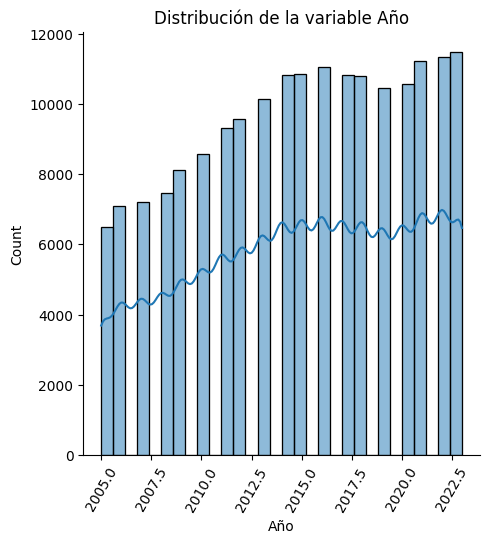

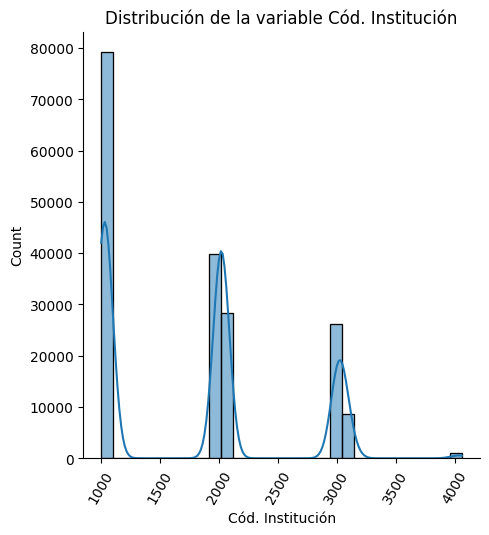

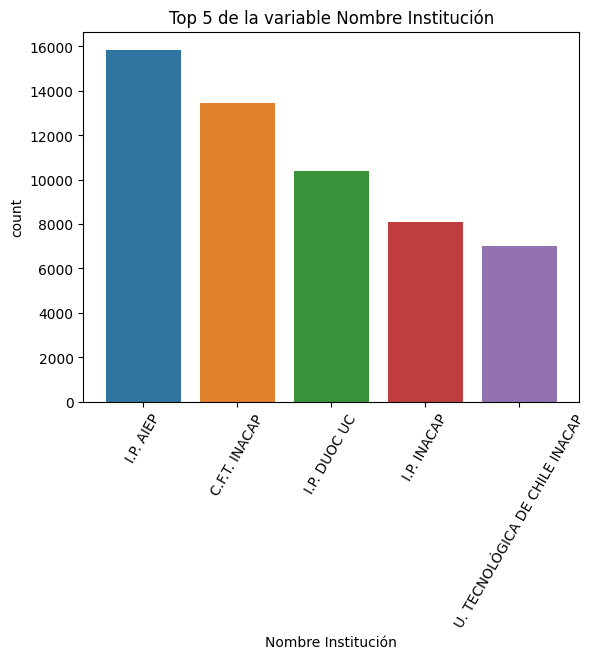

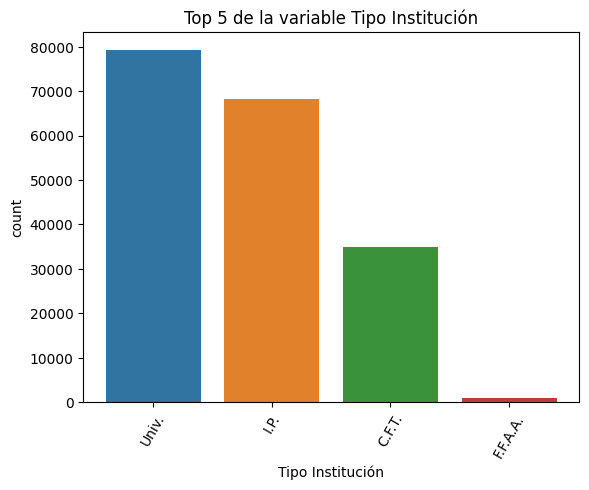

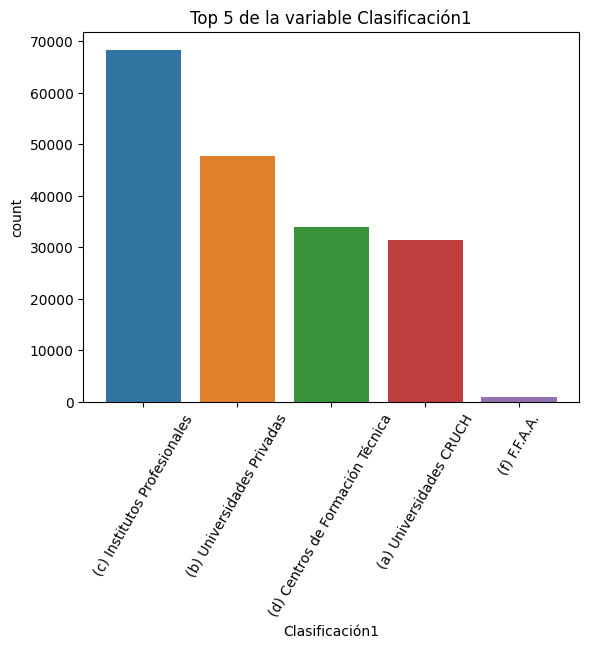

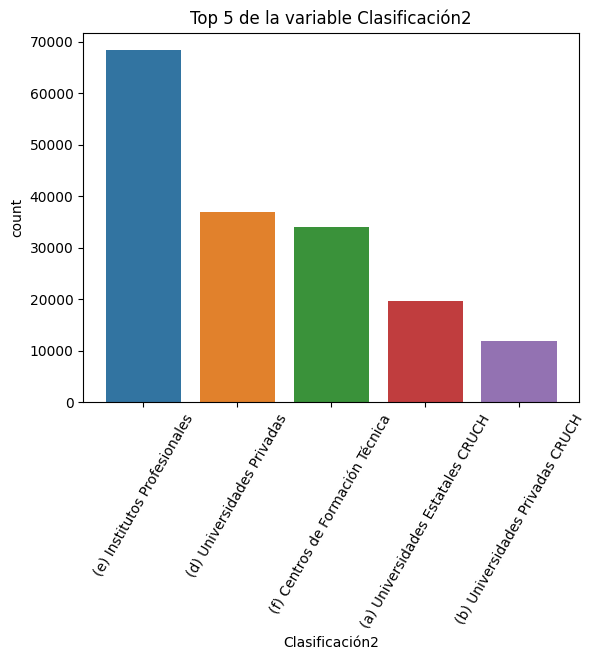

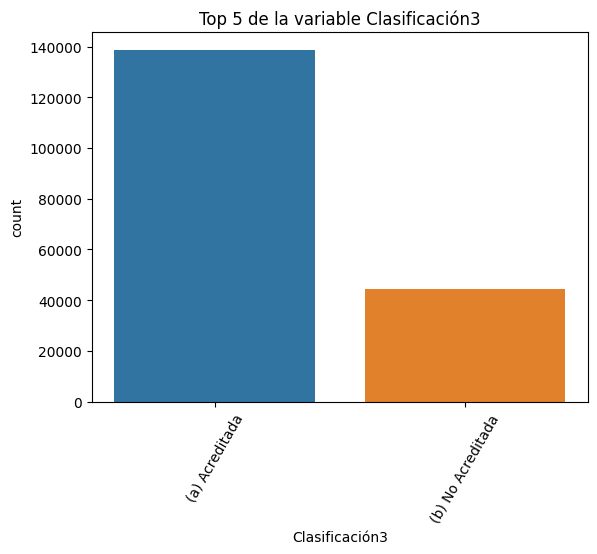

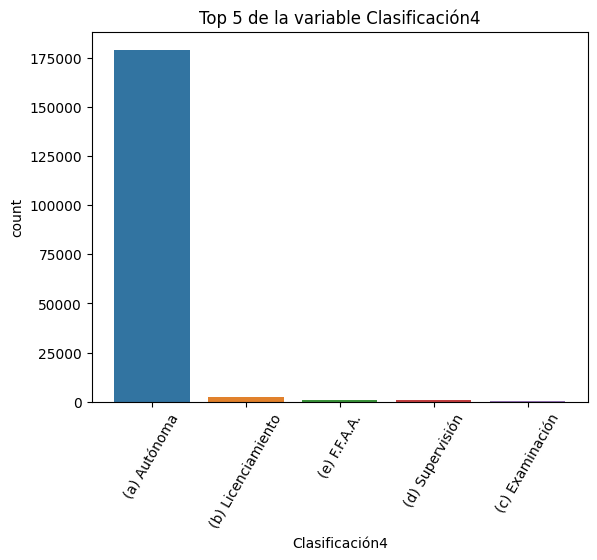

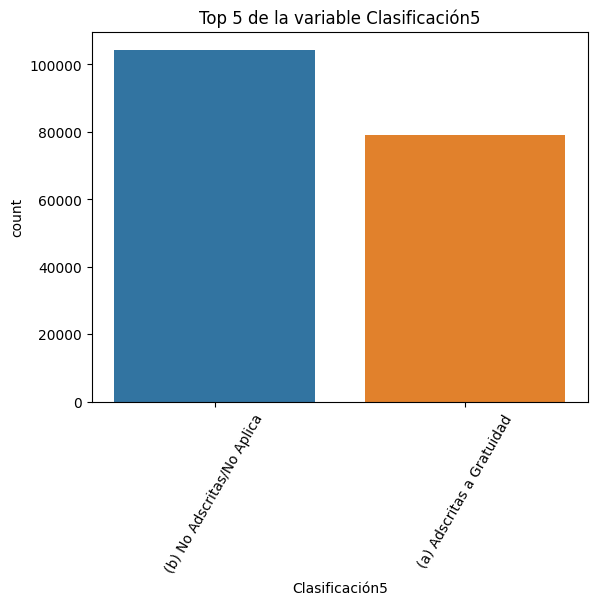

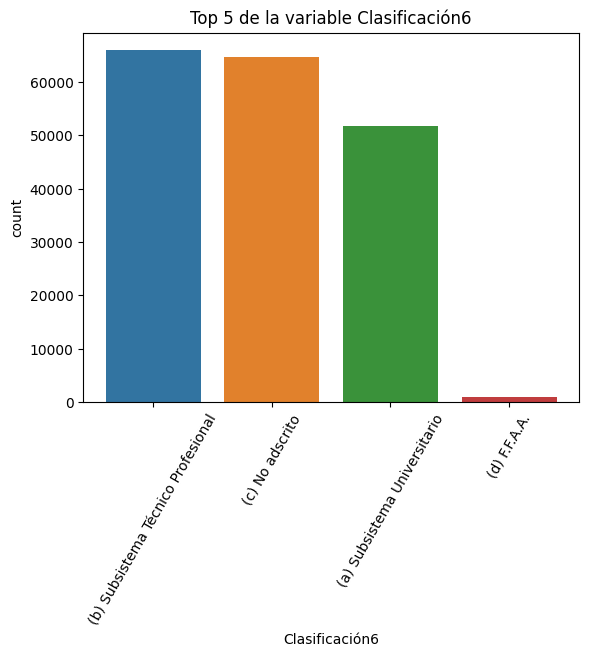

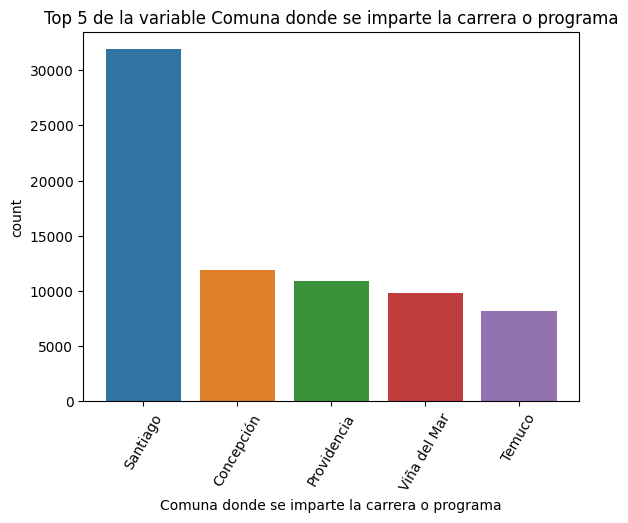

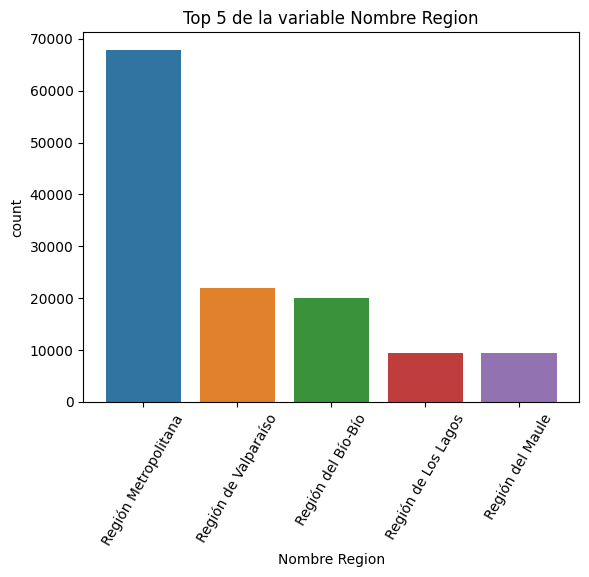

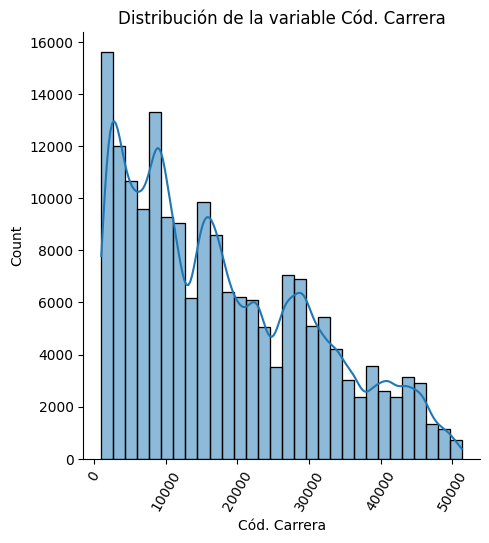

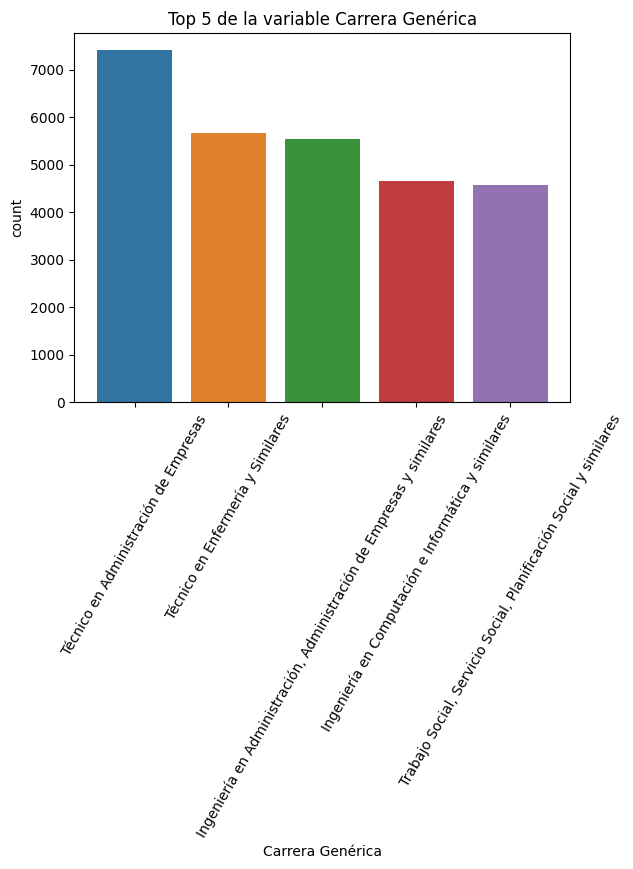

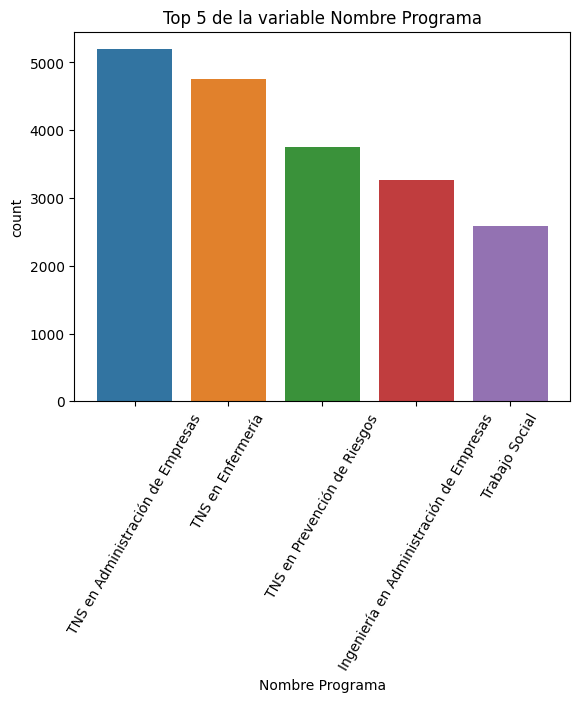

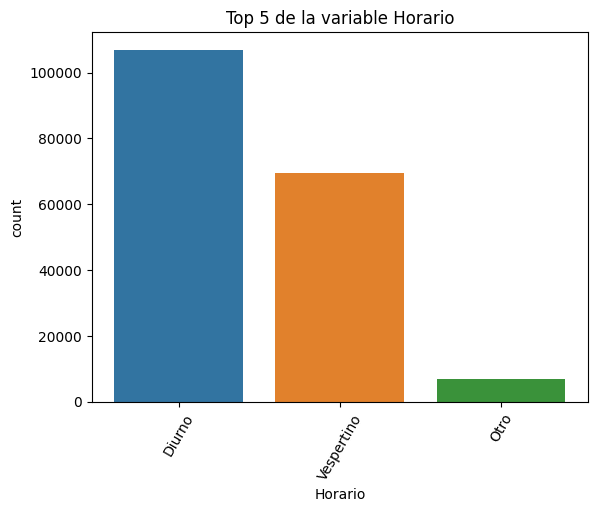

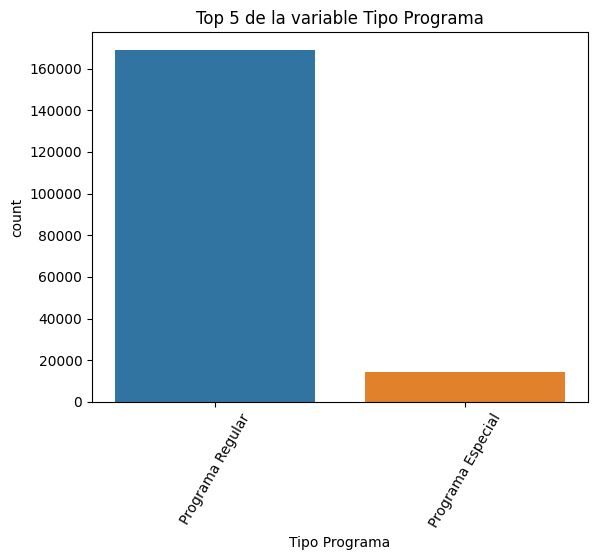

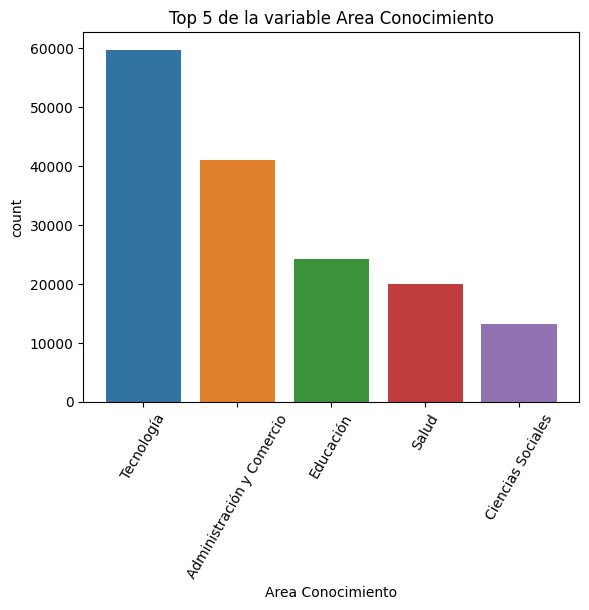

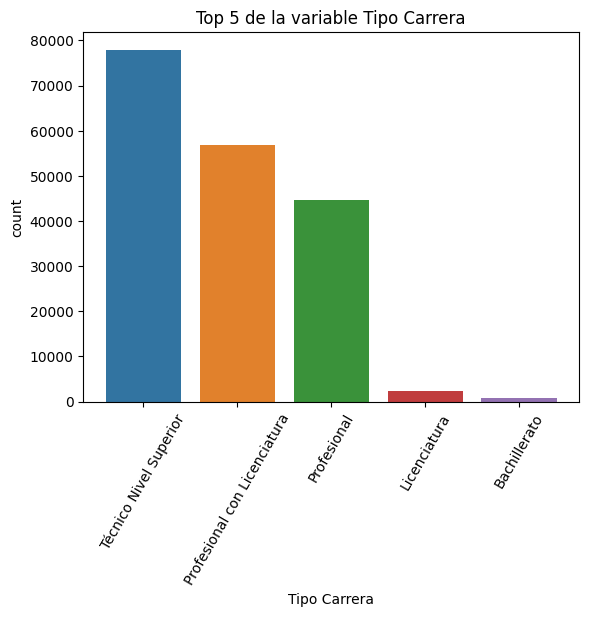

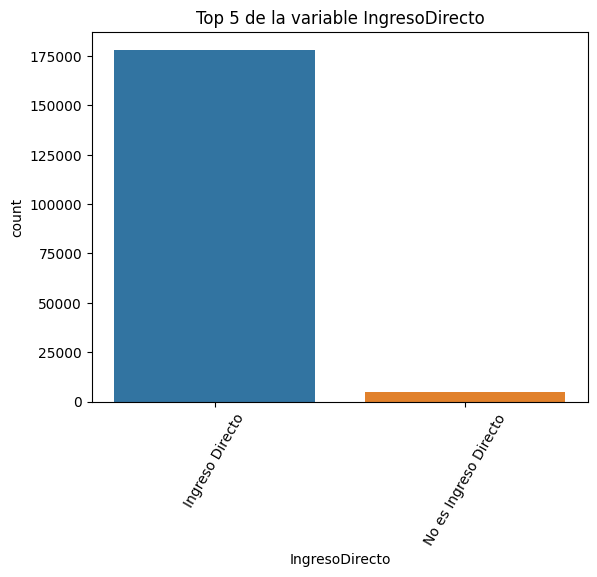

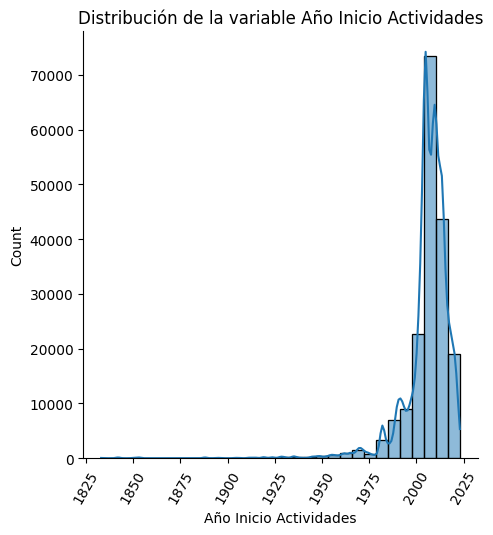

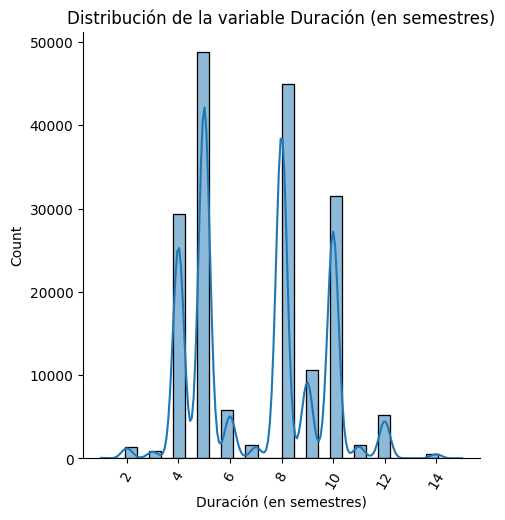

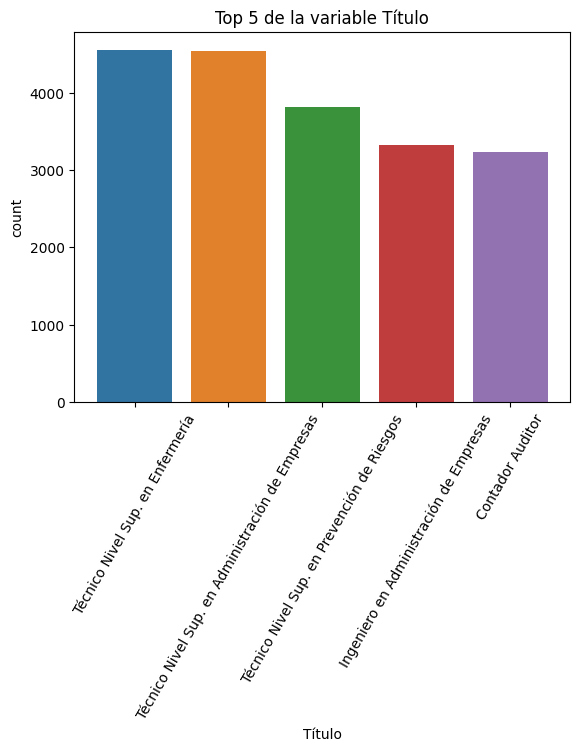

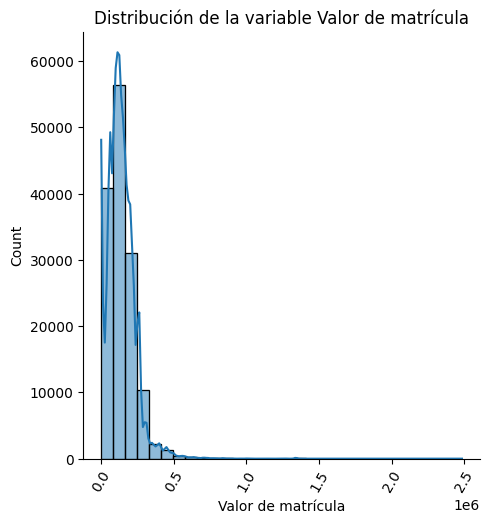

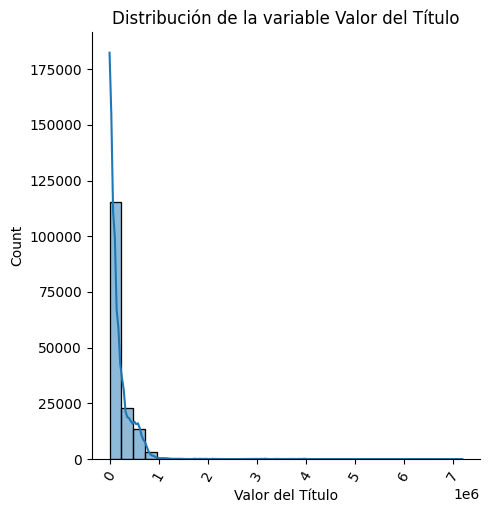

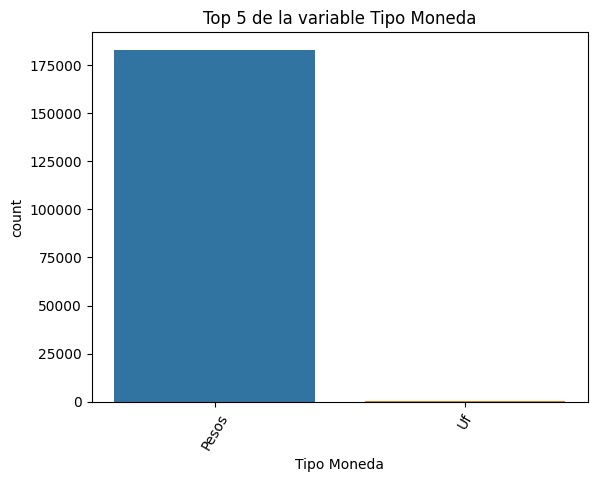

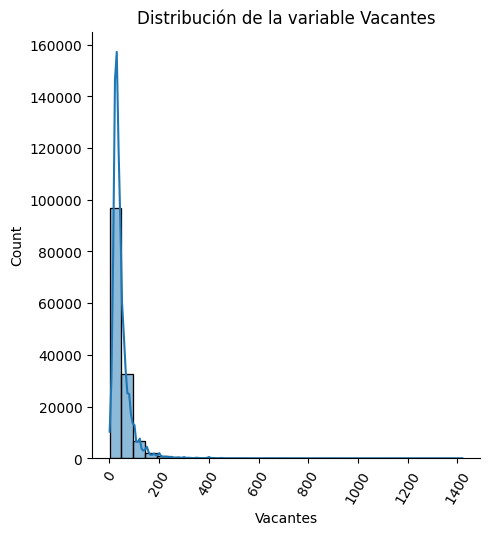

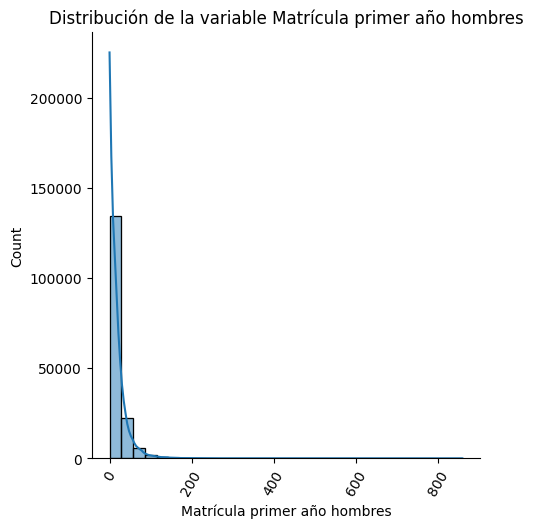

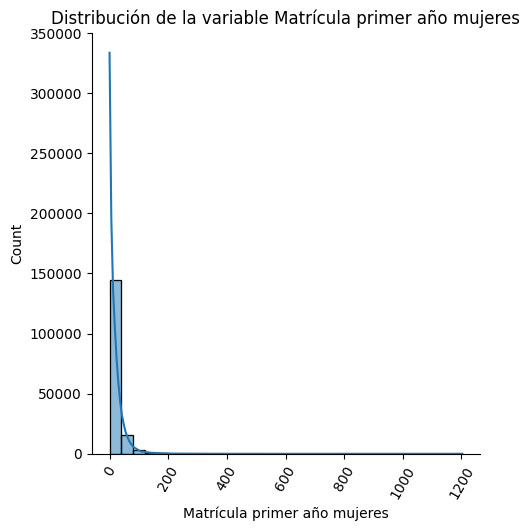

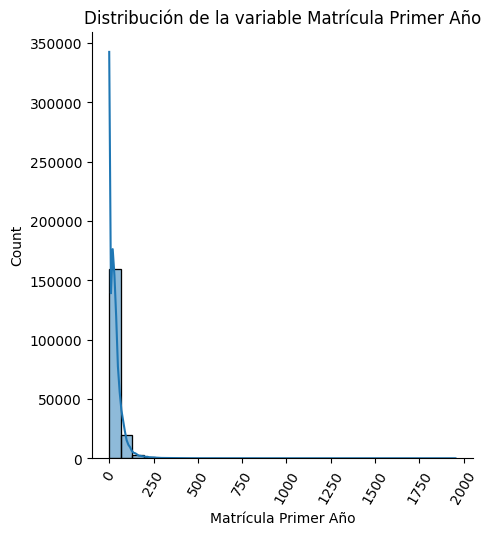

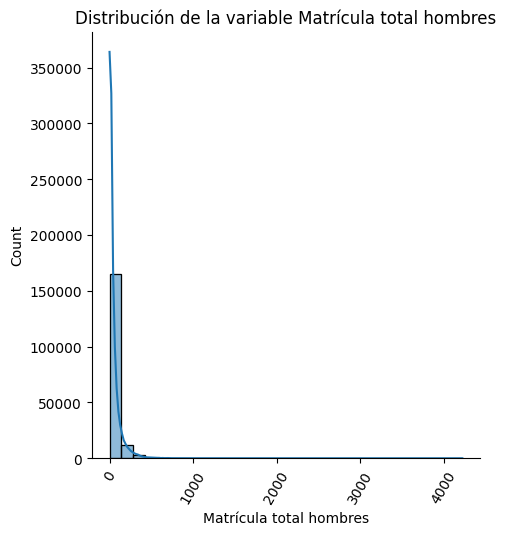

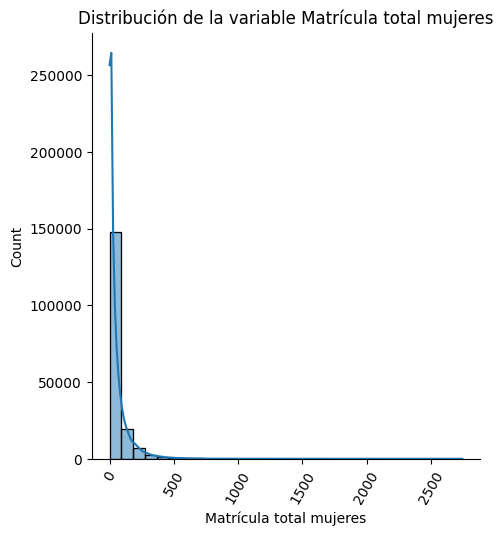

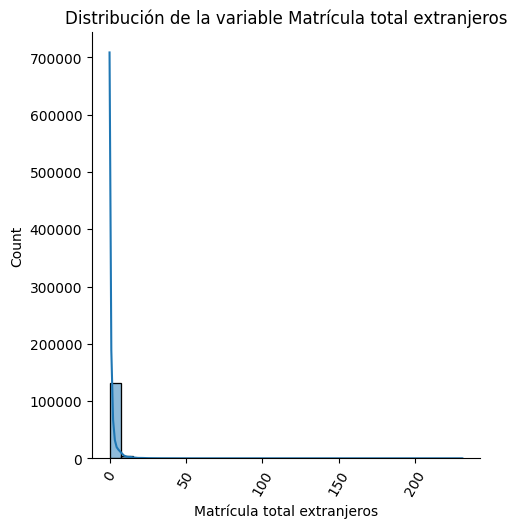

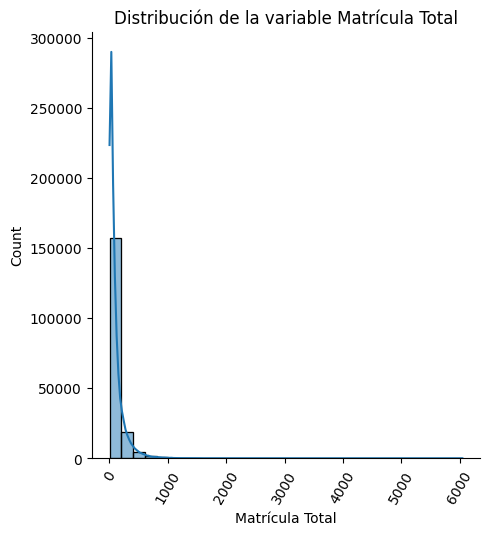

FileNotFoundError: [Errno 2] No such file or directory: 'EDA_10-11-2023/plots/hist_Pregrado/Posgrado.pdf'

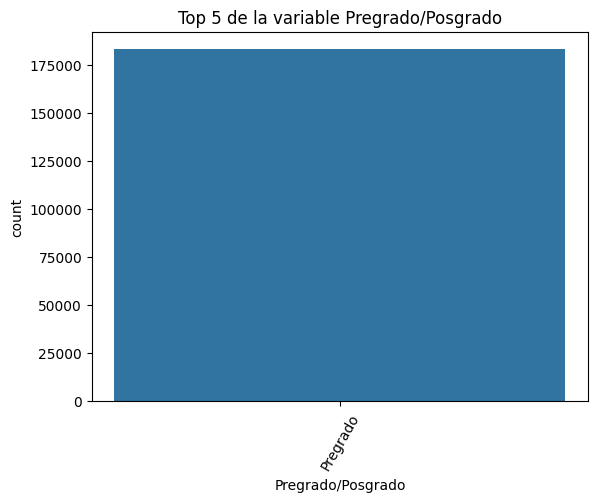

In [49]:
prueba.plot_vars(df.columns)

Número de clusters escogido es: 6


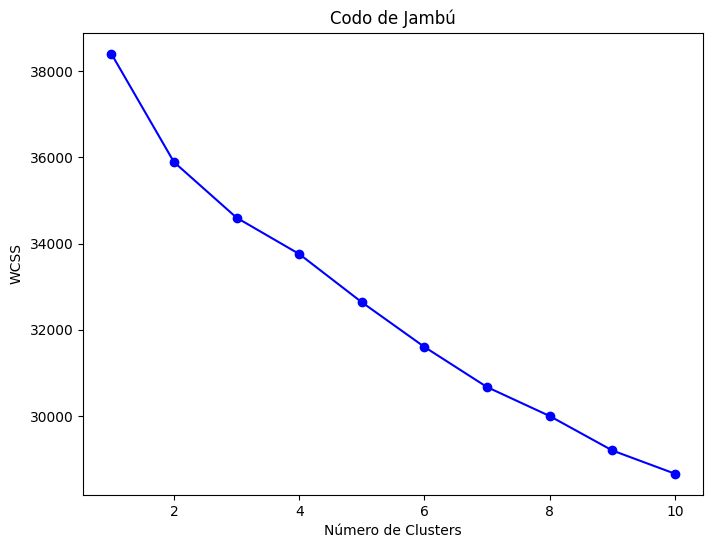

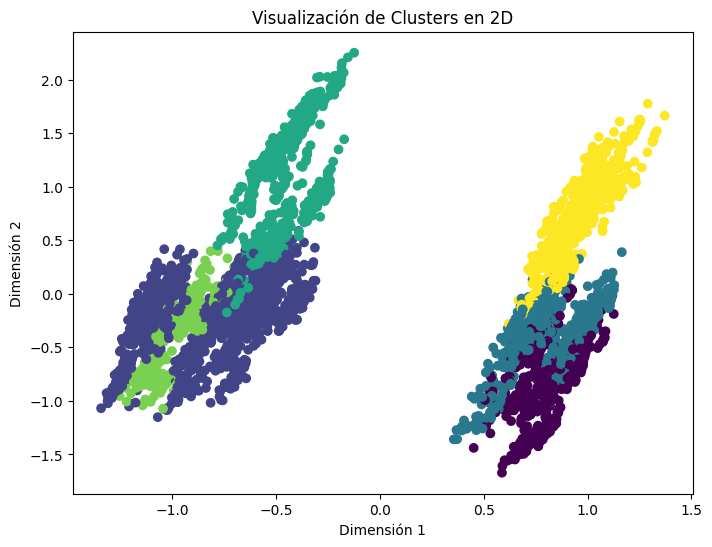

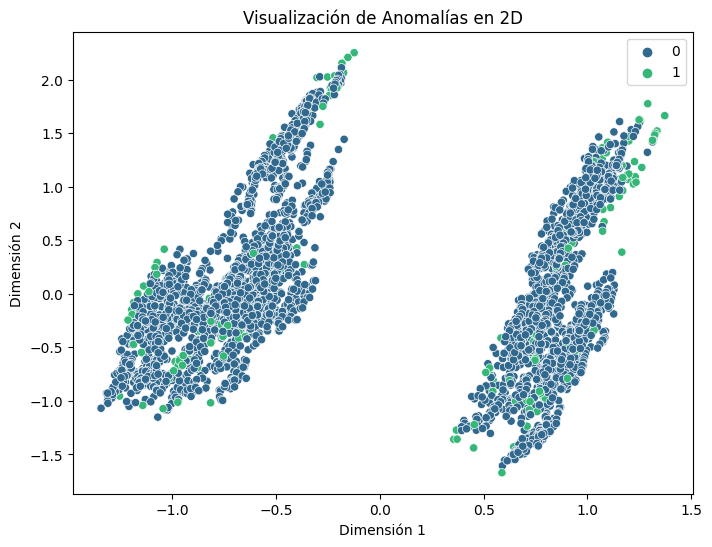

In [66]:
prueba.profile(
    variables=df_limpio.columns,
    clustering_algorithm=KMeans,
    anomaly_detector=OneClassSVM(nu=0.05),
    encoder=OneHotEncoder(sparse_output=False),
    # encoder = OrdinalEncoder(),
)

In [39]:
df_limpio.columns

Index(['Año', 'Cód. Institución', 'Nombre Institución', 'Tipo Institución',
       'Clasificación1', 'Clasificación2', 'Clasificación3', 'Clasificación4',
       'Clasificación5', 'Clasificación6',
       'Comuna donde se imparte la carrera o programa', 'Nombre Region',
       'Cód. Carrera', 'Carrera Genérica', 'Nombre Programa', 'Horario',
       'Tipo Programa', 'Area Conocimiento', 'Tipo Carrera', 'IngresoDirecto',
       'Año Inicio Actividades', 'Nombre del Campus',
       'Duración (en semestres)', 'Título', 'Grado Académico',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (último seleccionado)', 'Promedio Puntaje NEM',
       'Promedio Puntaje Ranking', 'Nº Alumnos Ingreso Via PSU o PDT',
       'Nº Alumnos Ingreso Otra Via', 'Valor de matrícula', 'Valor de arancel',
       'Valor del Título', 'Tipo Moneda', 'Vacantes',
       'Matrícula pr